# Logistic Regression

### Learn the basics of logistic regression and classification.

#### Contents:

- Classification
- Logit function
    - exponential transformation
    - normalization transformation
- sklearn.linear_model.LogisticRegression
- Plotting probabilities
    - model.predict_proba(test_data)

## 1: Classification

As we learned in the last mission, the fundamental goal of machine learning is to understand the relationship between the independent variable(s) and the dependent variable. Specifically, we're interested in the underlying mathematical function that uses the features to generate labels. In supervised machine learning, we use training data that contains a label for each row to approximate this function.

In the previous mission, we explored a supervised machine learning technique called linear regression. Linear regression works well when the target column we're trying to predict, the dependent variable, is ordered and continuous. If the target column instead contains discrete values, then linear regression isn't a good fit.

In this mission, we'll explore how to build a predictive model for these types of problems, which are known as **classification** problems. In classification, our target column has a finite set of possible values which represent different categories a row can belong to. We use integers to represent the different categories so we can continue to use mathematical functions to describe how the independent variables map to the dependent variable. Here are a few examples of classification problems:

| Problem                                                                   | Sample Features                                    | Type        | Categories           | Numerical Categories |
|---------------------------------------------------------------------------|----------------------------------------------------|-------------|----------------------|----------------------|
| Should we accept this student based on their graduate school application? | College GPA, SAT Score, Quality of Recommendations | Binary      | Don't Accept, Accept | 0, 1                 |
| What is the most likely blood type of 2 parent's offspring?               | Parent 1's blood type, Parent 2's blood type.      | Multi-class | A, B, AB, O          | 1, 2, 3, 4           |

We'll focus on **binary classification** for now, where the only 2 options for values are:

- 0 for the False condition,
- 1 for the True condition.

Before we dive into classification, let's understand the data we'll be working with.

## 2: Introduction To The Data

Every year high school student and college students apply to various universities and programs. Each student has a unique set of test scores, grades, and backgrounds. Somehow, the admission commitees must decide which applicants to accept or reject from their program. In this case a binary classification algorithm can be used to accept or reject applicants. To grasp the concepts of classification, we'll try to predict whether an applicant will be admitted to a graduate program in a U.S. university.

We'll be working with a dataset containing data on 644 applicants with the following columns:

- gre - applicant's store on the Graduate Record Exam, a generalized test for prospective graduate students.
    - Score ranges from 200 to 800.
- gpa - college grade point average.
    - Continuous between 0.0 and 4.0.
- admit - binary value
    - Binary value, 0 or 1, where 1 means the applicant was admitted to the program and 0 means the applicant was rejected.
    
Here's a preview of the dataset:

| admit | gpa      | gre        |
|-------|----------|------------|
| 0     | 3.177277 | 594.102992 |
| 0     | 3.412655 | 631.528607 |
| 0     | 2.728097 | 553.714399 |
| 0     | 3.093559 | 551.089985 |
| 0     | 3.141923 | 537.184894 |

While we can use both the gpa and gre columns to predict the admit column, we'll focus on using just the gpa column to keep things simple. Let's read the data into Pandas and visualize the relationship between gpa and admit.

#### Instructions:
- Read admissions.csv into a Dataframe named admissions.
- Use the Matplotlib method scatter to generate a scatter plot with the:
    - gpa column on the x-axis.
    - admit column on the y-axis.
- Use plt.show() to display the scatter plot.

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
admissions = pd.read_csv("data/admissions.csv")
admissions.head()

,admit,gpa,gre
0,0,3.177277,594.102992
1,0,3.412655,631.528607
2,0,2.728097,553.714399
3,0,3.093559,551.089985
4,0,3.141923,537.184894


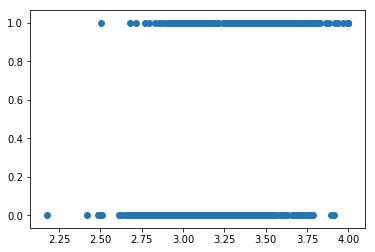

In [6]:
plt.scatter(admissions.gpa, admissions.admit)

## 3: Logistic Regression

In the previous scatter plot, you'll notice that the gpa column and the admit column do not have a clear linear relationship. Recall that the admit column only contains the values 0 and 1 and are used to represent binary values and the numbers themselves don't carry any weight. When numbers are used to represent different options or categories, they are referred to as **categorical values**. Classification focuses on estimating the relationship between the independent variables and the dependent, categorical variable.

In this mission, we'll focus on a classification technique called **logistic regression**. While a linear regression model outputs a real number as the label, a logistic regression model outputs a probability value. In binary classification, if the probability value is larger than a certain threshold probability, we assign the label for that row to 1 or 0 otherwise.

This threshold probability is something we select, and we'll learn about how to select a good threshold probability in later missions. For now, let's dive more into how logistic regression works.

## 4: Logit Function

In linear regression, we used the linear function `y = mx + b` to represent the relationship between the independent variables and the dependent variable. In logistic regression, we use the **logit function**, which is a version of the linear function that is adapted for classification.

Let's explore some of the logit function's properties to better understand why it's useful for classification tasks. Unlike in linear regression, where the output can be any real value, in logistic regression the output has to be a real value between 0 and 1, since the output represents a probability value. Note that the model can't output a negative value or it would violate this criteria.

Here's the mathematical representation of the logit function:

$$ \sigma(t) = \frac{e^{t}}{1+e^{t}}$$

The logit function is broken up into 2 key parts:

- The exponential transformation, transforming all values to be positive:

$$e^{t}$$

- The normalization transformation, transforming all values to range between 0 and 1:

$$\frac{t}{1+t}$$

The exponential transformation and the normalization forces the output values to be squeezed between 0 and 1. If you plot just the exponential part, the output values won't be limited to the range of 0 to 1:

<img src="https://dq-content.s3.amazonaws.com/4esqrpy.png">

The normalization part alone unfortunately isn't sufficient since it struggles at constraining negative values:

<img src="https://dq-content.s3.amazonaws.com/qbpTcrr.png">

Together, both of these pieces work well to constrain the output to the range of values that probabilities are in. In the following code cell, we plot the logit function to visualize its properties. Specifically, we:

- define the logit function using the NumPy exp function,
- generate equally spaced values, between -6 and 6 to represent the x-axis,
- calculate the y-axis values by feeding each value in x to the logit function,
- creating a line plot to visualize x and y.

The generated plot will demonstrate that the y-axis values are constrained to range from 0 to 1. We encourage you to plot more x-values to confirm that this holds true for all potential x values.

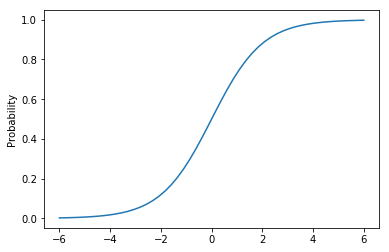

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Logit Function
def logit(x):
    # np.exp(x) raises x to the exponential power, ie e^x. e ~= 2.71828
    return np.exp(x)  / (1 + np.exp(x)) 
    
# Generate 50 real values, evenly spaced, between -6 and 6.
x = np.linspace(-6,6,50, dtype=float)

# Transform each number in t using the logit function.
y = logit(x)

# Plot the resulting data.
plt.plot(x, y)
plt.ylabel("Probability")
plt.show()

## 5: Training A Logistic Regression Model

Let's now move onto training the logistic regression model using our dataset. We won't dive into the math and the steps required to fit a logistic regression model to the training data in this mission. We'll instead focus on using the scikit-learn library to fit a model between the gpa and admit columns. Recall that the gpa column contains the GPA of each applicant as a real value between 0.0 and 4.0 and the admit column specifies if that applicant was admitted (0 if not admitted and 1 if admitted). Since we're only working with one feature, gpa, this is referred to as a univariate model.

Training a logistic regression model in scikit-learn is similar to training a linear regression model, with the key difference that we use the **LogisticRegression** class instead of the **LinearRegression** class. Scikit-learn was designed to make it easy to swap out models by keeping the syntax and notation as consistent as possible across it's different classes.

#### Instructions:

- Import the LogisticRegression class and instantiate a model named logistic_model.
- Use the LogisticRegression method fit to fit the model to the data. We're only interested in constructing a model that uses gpa values to predict admit values.
- View the documentation for the LogisticRegression class if you get stuck.

In [9]:
import pandas as pd

admissions = pd.read_csv("data/admissions.csv")

In [10]:
from sklearn.linear_model import LinearRegression

linear_model = LinearRegression()
linear_model.fit(admissions[["gpa"]], admissions["admit"])

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [12]:
from sklearn.linear_model import LogisticRegression

logistic_model = LogisticRegression()
logistic_model.fit(admissions[['gpa']], admissions['admit'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## 6: Plotting Probabilities

We mentioned earlier that the output of a logistic regression model is the probability that the row should be labelled as **True**, or in our case **1**. We can use the trained model to return the predicted probability for each row in the training data.

To return the predicted probability, use the [predict_proba](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) method. The only required parameter for this method is the `num_features` by `num_sample` matrix of observations we want scikit-learn to return predicted probabilities for. For each input row, scikit-learn will return a NumPy array with 2 probability values:

- the probability that the row should be labelled 0,
- the probability that the row should be labelled 1.

Since 0 and 1 are the only 2 possible categories and represent the entire outcome space, these 2 probabilities will always add upto 1.

    probabilities = logistic_model.predict_proba(admissions[["gpa"]])
    # Probability that the row belongs to label `0`.
    probabilities[:,0]
    # Probabililty that the row belongs to label `1`.
    probabilities[:,1]
    
Let's use this method to return the probability for each student that they would be admitted and then visualize the results on a scatter plot.

#### Instructions:
- Use the LogisticRegression method predict_proba to return the predicted probabilities for the data in the gpa column. Assign the returned probabilities to pred_probs.
- Create and display a scatter plot using the Matplotlib scatter function where:
    - the x-axis is the values in the gpa column,
    - the y-axis is the probability of being classified as label 1.    

0.633879179964 0.366120820036


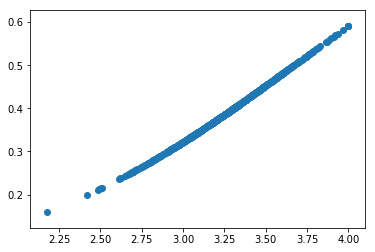

In [19]:
pred_probs = logistic_model.predict_proba(admissions[["gpa"]])
print(pred_probs[0,0], pred_probs[0,1])

import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(admissions['gpa'], pred_probs[:,1])

## 7: Predict Labels

You'll notice that the scatter plot suggests a linear relationship between the gpa values and the probability of being admitted. This is because logistic regression is really just an adapted version of linear regression for classification problems. Both logistic and linear regression are used to capture linear relationships between the independent variables and the dependent variable.

Let's now use the predict method to return the label predictions for each row in our training dataset.

#### Instructions:
- Use the LogisticRegression method predict to return the predicted for each label in the training set.
    - The parameter for the predict method matches that of the predict_proba method:
        - X: rows of data to use for prediction.
    - Assign the result to fitted_labels.
- Use the print function to display the first 10 values in fitted_labels.

In [21]:
fitted_labels = logistic_model.predict(admissions[['gpa']])
print(fitted_labels[:10])

[0 0 0 0 0 0 0 0 0 1]


## 8: Next Steps

In this mission, we learned the basics of classification and how to use a specific classification technique called logistic regression. In the next mission, we'll learn how to evaluate the effectiveness of a classification model.